## Data merging Basics

### Your first inner join
You have been tasked with figuring out what the most popular types of fuel used in Chicago taxis are. To complete the analysis, you need to merge the `taxi_owners` and `taxi_veh` tables together on the `vid` column. You can then use the merged table along with the `.value_counts()` method to find the most common `fuel_type`.
>inner joins only return the rows with matching values in both tables.

In [6]:
# files in the datasets_join folder
import os

os.listdir("datasets_join")

['actors_movies.csv',
 'business_owners.p',
 'casts.p',
 'census.p',
 'crews.p',
 'cta_calendar.p',
 'cta_ridership.p',
 'financials.p',
 'land_use.p',
 'licenses.p',
 'movies.p',
 'movie_to_genres.p',
 'ratings.p',
 'S&P500.csv',
 'sequels.p',
 'stations.p',
 'taglines.p',
 'taxi_owners.p',
 'taxi_vehicles.p',
 'ward (1).p',
 'WorldBank_GDP.csv',
 'WorldBank_POP.csv',
 'zip_demo.p']

In [7]:
import pandas as pd
taxi_owners = pd.read_pickle('datasets_join/taxi_owners.p')
taxi_owners.head()

,rid,vid,owner,address,zip
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618


In [8]:
taxi_veh = pd.read_pickle('datasets_join/taxi_vehicles.p')
taxi_veh.head()

,vid,make,model,year,fuel_type,owner
0,2767,TOYOTA,CAMRY,2013,HYBRID,SEYED M. BADRI
1,1411,TOYOTA,RAV4,2017,HYBRID,DESZY CORP.
2,6500,NISSAN,SENTRA,2019,GASOLINE,AGAPH CAB CORP
3,2746,TOYOTA,CAMRY,2013,HYBRID,"MIDWEST CAB CO, INC"
4,5922,TOYOTA,CAMRY,2013,HYBRID,SUMETTI CAB CO


In [9]:
# Merge the taxi_owners and taxi_veh tables
taxi_own_veh = taxi_owners.merge(taxi_veh, on='vid')

# Print the column names of the taxi_own_veh
taxi_own_veh.columns

Index(['rid', 'vid', 'owner_x', 'address', 'zip', 'make', 'model', 'year',
       'fuel_type', 'owner_y'],
      dtype='object')

In [10]:
# Merge the taxi_owners and taxi_veh tables setting a suffix
taxi_own_veh = taxi_owners.merge(taxi_veh, on='vid', suffixes = ('_own', '_veh'))

# Print the column names of taxi_own_veh
print(taxi_own_veh.columns)

Index(['rid', 'vid', 'owner_own', 'address', 'zip', 'make', 'model', 'year',
       'fuel_type', 'owner_veh'],
      dtype='object')


In [11]:
# Merge the taxi_owners and taxi_veh tables setting a suffix
taxi_own_veh = taxi_owners.merge(taxi_veh, on='vid', suffixes=('_own','_veh'))

# Print the value_counts to find the most popular fuel_type
taxi_own_veh['fuel_type'].value_counts()

fuel_type
HYBRID                    2792
GASOLINE                   611
FLEX FUEL                   89
COMPRESSED NATURAL GAS      27
Name: count, dtype: int64

>The most common fuel type for taxis in Chicago are hybrids.

### Inner joins and number of rows returned
All of the merges you have studied to this point are called inner joins. It is necessary to understand that inner joins only return the rows with matching values in both tables. You will explore this further by reviewing the merge between the `wards` and `census` tables, then comparing it to merges of copies of these tables that are slightly altered, named `wards_altered`, and `census_altered`. The first row of the wards column has been changed in the altered tables. You will examine how this affects the merge between them. The tables have been loaded for you.

For this exercise, it is important to know that the `wards` and `census` tables start with 50 rows.

In [14]:
wards = pd.read_pickle('datasets_join/ward (1).p')
wards.head()

,ward,alderman,address,zip
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649


In [15]:
census = pd.read_pickle('datasets_join/census.p')
census.head()

,ward,pop_2000,pop_2010,change,address,zip
0,1,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622
2,3,40385,53039,31%,17 EAST 38TH STREET,60653
3,4,51953,54589,5%,31ST ST HARBOR BUILDING LAKEFRONT TRAIL,60653
4,5,55302,51455,-7%,JACKSON PARK LAGOON SOUTH CORNELL DRIVE,60637


In [16]:
# Merge the wards and census tables on the ward column
wards_census = wards.merge(census, on='ward')

# Print the shape of wards_census
print('wards_census table shape:', wards_census.shape)

wards_census table shape: (50, 9)


### One-to-many relationship merge
A business may have one or multiple owners. In this exercise, you will continue to gain experience with one-to-many merges by merging a table of business owners, called `biz_owners`, to the `licenses` table. Recall from the video lesson, with a one-to-many relationship, a row in the left table may be repeated if it is related to multiple rows in the right table. In this lesson, you will explore this further by finding out what is the most common business owner title. (i.e., secretary, CEO, or vice president).

In [18]:
biz_owners = pd.read_pickle('datasets_join/business_owners.p')
biz_owners.head()

,account,first_name,last_name,title
0,10,PEARL,SHERMAN,PRESIDENT
1,10,PEARL,SHERMAN,SECRETARY
2,10002,WALTER,MROZEK,PARTNER
3,10002,CELINA,BYRDAK,PARTNER
4,10005,IRENE,ROSENFELD,PRESIDENT


In [19]:
licenses = pd.read_pickle('datasets_join/licenses.p')
licenses.head()

,account,ward,aid,business,address,zip
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616
1,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633
2,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632
3,10005,12,NaN,KRAFT FOODS NORTH AMERICA,2005 W 43RD ST,60609
4,10044,44,638,NEYBOUR'S TAVERN & GRILLE,3651 N SOUTHPORT AVE,60613


In [20]:
# Merge the licenses and biz_owners table on account
licenses_owners = licenses.merge(biz_owners, on='account')

# Group the results by title then count the number of accounts
counted_df = licenses_owners.groupby('title').agg({'account':'count'})

# Sort the counted_df in descending order
sorted_df = counted_df.sort_values('account', ascending=False)

# Use .head() method to print the first few rows of sorted_df
sorted_df.head().style.highlight_max(color='green').highlight_min(color='red')

,account
title,
PRESIDENT,6259
SECRETARY,5205
SOLE PROPRIETOR,1658
OTHER,1200
VICE PRESIDENT,970


>You see that president, followed by secretary, are the most common business owner titles.

### Merging Multiple DataFrame

#### Total riders in a month

**Your goal:** Find the total number of rides provided to passengers passing through the Wilson station ( `station_name == 'Wilson'` ) when riding Chicago's public transportation system on weekdays ( `day_type == 'Weekday'` ) in July ( `month == 7` ).

Luckily, Chicago provides this detailed data, but it is in three different tables. You will work on merging these tables together to answer the question. This data is different from the business-related data you have seen so far, but all the information you need to answer the question is provided.

The `cal`, `ridership`, and `stations` DataFrames have been loaded.

In [24]:
cal = pd.read_pickle('datasets_join/cta_calendar.p')
cal.head()

,year,month,day,day_type
0,2019,1,1,Sunday/Holiday
1,2019,1,2,Weekday
2,2019,1,3,Weekday
3,2019,1,4,Weekday
4,2019,1,5,Saturday


In [25]:
ridership = pd.read_pickle('datasets_join/cta_ridership.p')
ridership.head()

,station_id,year,month,day,rides
0,40010,2019,1,1,576
1,40010,2019,1,2,1457
2,40010,2019,1,3,1543
3,40010,2019,1,4,1621
4,40010,2019,1,5,719


In [26]:
stations = pd.read_pickle('datasets_join/stations.p')
stations.head()

,station_id,station_name,location
0,40010,Austin-Forest Park,"(41.870851, -87.776812)"
1,40020,Harlem-Lake,"(41.886848, -87.803176)"
2,40030,Pulaski-Lake,"(41.885412, -87.725404)"
3,40040,Quincy/Wells,"(41.878723, -87.63374)"
4,40050,Davis,"(42.04771, -87.683543)"


In [27]:
# Merge the ridership and cal tables
ridership_cal = ridership.merge(cal)
ridership_cal.columns

Index(['station_id', 'year', 'month', 'day', 'rides', 'day_type'], dtype='object')

In [28]:
# Merge the ridership, cal, and stations tables
ridership_cal_stations = ridership.merge(cal, on=['year','month','day']) \
            				.merge(stations)
ridership_cal_stations.columns

Index(['station_id', 'year', 'month', 'day', 'rides', 'day_type',
       'station_name', 'location'],
      dtype='object')

In [29]:
# Create a filter to filter ridership_cal_stations
filter_criteria = ((ridership_cal_stations['month'] == 7) 
                   & (ridership_cal_stations['day_type'] == 'Weekday') 
                   & (ridership_cal_stations['station_name'] == 'Wilson'))

ridership_cal_stations[filter_criteria].head()

,station_id,year,month,day,rides,day_type,station_name,location
1641,40540,2019,7,1,6464,Weekday,Wilson,"(41.964273, -87.657588)"
1642,40540,2019,7,2,6491,Weekday,Wilson,"(41.964273, -87.657588)"
1643,40540,2019,7,3,6639,Weekday,Wilson,"(41.964273, -87.657588)"
1645,40540,2019,7,5,4794,Weekday,Wilson,"(41.964273, -87.657588)"
1648,40540,2019,7,8,6351,Weekday,Wilson,"(41.964273, -87.657588)"


In [30]:
# Use .loc and the filter to select for rides
print(ridership_cal_stations.loc[filter_criteria, 'rides'].sum())

140005


>The Wilson station had 140,005 riders during weekdays in July.

#### Three Table Merge

To solidify the concept of a three DataFrame merge, practice another exercise. A reasonable extension of our review of Chicago business data would include looking at demographics information about the neighborhoods where the businesses are. A table with the median income by zip code has been provided to you. You will merge the `licenses` and `wards` tables with this new income-by-zip-code table called `zip_demo`.

The `licenses`, `wards`, and `zip_demo` DataFrames have been loaded.


In [33]:
zip_demo = pd.read_pickle('datasets_join/zip_demo.p')
zip_demo.head()

,zip,income
0,60630,70122
1,60640,50488
2,60622,87143
3,60614,100116
4,60608,41226


In [34]:
# Merge licenses and zip_demo, on zip; and merge the wards on ward
licenses_zip_ward = licenses.merge(zip_demo, on='zip') \
            			.merge(wards, on='ward')

# Print the results by alderman and show median income
income = licenses_zip_ward.groupby('alderman').agg({'income':'median'})

sorted_income = income.sort_values('income', ascending=False)

sorted_income.style.highlight_max(color='green').highlight_min(color='red')

,income
alderman,
Brendan Reilly,110215.000000
William D. Burns,107811.000000
Michelle Smith,100116.000000
Tom Tunney,88708.000000
Brian Hopkins,87143.000000
"Proco ""Joe"" Moreno",87143.000000
"Walter Burnett, Jr.",87143.000000
Anthony V. Napolitano,82226.000000
James Cappleman,79565.000000


>You see that only a few aldermen represent businesses in areas where the median income is greater than $62,000, which is the median income for the state of Illinois.

#### One-to-many merge with multiple tables

In this exercise, assume that you are looking to start a business in the city of Chicago. Your perfect idea is to start a company that uses goats to mow the lawn for other businesses. However, you have to choose a location in the city to put your goat farm. You need a location with a great deal of space and relatively few businesses and people around to avoid complaints about the smell. You will need to merge three tables to help you choose your location.

The `land_use` table has info on the percentage of vacant land by city ward. 

The `census` table has population by ward, and the `licenses` table lists businesses by ward.

In [37]:
land_use = pd.read_pickle('datasets_join/land_use.p')
land_use.head()

,ward,residential,commercial,industrial,vacant,other
0,1,41,9,2,2,46
1,2,31,11,6,2,50
2,3,20,5,3,13,59
3,4,22,13,0,7,58
4,5,25,3,1,3,68


In [38]:
# Merge land_use and census and merge result with licenses including suffixes
land_cen_lic =land_use.merge(census, on='ward') \
                      .merge(licenses, on='ward', suffixes=['_cen', '_lic'])
land_cen_lic.head()

,ward,residential,commercial,industrial,vacant,other,pop_2000,pop_2010,change,address_cen,zip_cen,account,aid,business,address_lic,zip_lic
0,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,12024,NaN,DIGILOG ELECTRONICS,1038 N ASHLAND AVE,60622
1,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,14446,743,EMPTY BOTTLE INC,1035 N WESTERN AVE 1ST,60622
2,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,14624,775,LITTLE MEL'S HOT DOG,2205 N CALIFORNIA AVE,60647
3,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,14987,NaN,MR. BROWN'S LOUNGE,2301 W CHICAGO AVE 1ST,60622
4,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,15642,814,Beat Kitchen,2000-2100 W DIVISION ST,60622


In [39]:
# Group by ward, pop_2010, and vacant, then count the # of accounts
pop_vac_lic = land_cen_lic.groupby(['ward', 'pop_2010', 'vacant'], 
                                   as_index=False).agg({'account':'count'})
# Sort pop_vac_lic and print the results
sorted_pop_vac_lic = pop_vac_lic.sort_values(['vacant', 'account', 'pop_2010'], 
                                             ascending=[False, True, True])

# Print the top few rows of sorted_pop_vac_lic
sorted_pop_vac_lic.head()

,ward,pop_2010,vacant,account
47,7,51581,19,80
12,20,52372,15,123
1,10,51535,14,130
16,24,54909,13,98
7,16,51954,13,156


>The 7th ward would be a good place to build your goat farm!

## Merging Tables With Different Join Types

### left join

#### Enriching a dataset
Setting `how='left'` with the `.merge()` method is a useful technique for enriching or enhancing a dataset with additional information from a different table. In this exercise, you will start off with a sample of movie data from the movie series Toy Story. Your goal is to enrich this data by adding the marketing tag line for each movie. You will compare the results of a left join versus an inner join.

The `toy_story` DataFrame contains the ***Toy Story*** movies. The `toy_story` and `taglines` DataFrames have been loaded for you.

In [43]:
import pandas as pd
import os
# os.listdir('datasets_join/')

In [44]:
movies = pd.read_pickle('datasets_join/movies.p')
movies.head()

,id,title,popularity,release_date
0,257,Oliver Twist,20.415572,2005-09-23
1,14290,Better Luck Tomorrow,3.877036,2002-01-12
2,38365,Grown Ups,38.864027,2010-06-24
3,9672,Infamous,3.680896,2006-11-16
4,12819,Alpha and Omega,12.300789,2010-09-17


In [45]:
toy_title_ls = ['Toy Story 3', 'Toy Story 2', 'Toy Story']

toy_title_sub = movies['title'].isin(toy_title_ls)

toy_story = movies[toy_title_sub]

toy_story

,id,title,popularity,release_date
103,10193,Toy Story 3,59.995418,2010-06-16
2637,863,Toy Story 2,73.575118,1999-10-30
3716,862,Toy Story,73.640445,1995-10-30


In [46]:
taglines = pd.read_pickle('datasets_join/taglines.p')
taglines.head()

,id,tagline
0,19995,Enter the World of Pandora.
1,285,"At the end of the world, the adventure begins."
2,206647,A Plan No One Escapes
3,49026,The Legend Ends
4,49529,"Lost in our world, found in another."


In [47]:
# Merge the toy_story and taglines tables with a left join
toystory_tag = toy_story.merge(taglines, on='id', how='left')

# Print the rows and shape of toystory_tag
toystory_tag

,id,title,popularity,release_date,tagline
0,10193,Toy Story 3,59.995418,2010-06-16,No toy gets left behind.
1,863,Toy Story 2,73.575118,1999-10-30,The toys are back!
2,862,Toy Story,73.640445,1995-10-30,NaN


In [48]:
print(toystory_tag.shape)

(3, 5)


In [49]:
# Merge the toy_story and taglines tables with a inner join
toystory_tag = toy_story.merge(taglines, on='id')

# Print the rows and shape of toystory_tag
toystory_tag

,id,title,popularity,release_date,tagline
0,10193,Toy Story 3,59.995418,2010-06-16,No toy gets left behind.
1,863,Toy Story 2,73.575118,1999-10-30,The toys are back!


In [50]:
print(toystory_tag.shape)

(2, 5)


>If your goal is to enhance or enrich a dataset, then you do not want to lose any of your original data. A left join will do that by returning all of the rows of your left table, while using an inner join may result in lost data if it does not exist in both tables.

### Other joins
#### Right join to find unique movies
Most of the recent big-budget science fiction movies can also be classified as action movies. You are given a table of science fiction movies called `scifi_movies` and another table of action movies called `action_movies`. Your goal is to find which movies are considered only science fiction movies. Once you have this table, you can merge the movies table in to see the movie names. Since this exercise is related to science fiction movies, use a right join as your superhero power to solve this problem.

In [53]:
movies_to_genre = pd.read_pickle('datasets_join/movie_to_genres.p')
movies_to_genre.head()

,movie_id,genre
0,5,Crime
1,5,Comedy
2,11,Science Fiction
3,11,Action
4,11,Adventure


In [54]:
scifi_movies = movies_to_genre[movies_to_genre['genre'] == 'Science Fiction']
scifi_movies.head()

,movie_id,genre
2,11,Science Fiction
17,18,Science Fiction
20,19,Science Fiction
38,38,Science Fiction
49,62,Science Fiction


In [55]:
action_movies = movies_to_genre[movies_to_genre['genre'] == 'Action']
action_movies.head()

,movie_id,genre
3,11,Action
14,18,Action
25,22,Action
26,24,Action
42,58,Action


In [56]:
# Merge action_movies to scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, 
                                   how='right', 
                                   on='movie_id', 
                                   suffixes=['_act', '_sci'])
action_scifi.head()

,movie_id,genre_act,genre_sci
0,11,Action,Science Fiction
1,18,Action,Science Fiction
2,19,NaN,Science Fiction
3,38,NaN,Science Fiction
4,62,NaN,Science Fiction


In [57]:
# From action_scifi, select only the rows where the genre_act column is null
scifI_only = action_scifi[action_scifi['genre_act'].isnull()]

scifI_only.head()

,movie_id,genre_act,genre_sci
2,19,NaN,Science Fiction
3,38,NaN,Science Fiction
4,62,NaN,Science Fiction
5,68,NaN,Science Fiction
6,74,NaN,Science Fiction


In [58]:
movies.columns

Index(['id', 'title', 'popularity', 'release_date'], dtype='object')

In [59]:
# Merge the movies and scifi_only tables with an inner join
movies_and_scifi_only = movies.merge(scifI_only, how='inner', left_on='id', right_on='movie_id')

In [60]:
movies_and_scifi_only.head()

,id,title,popularity,release_date,movie_id,genre_act,genre_sci
0,18841,The Lost Skeleton of Cadavra,1.680525,2001-09-12,18841,NaN,Science Fiction
1,26672,The Thief and the Cobbler,2.439184,1993-09-23,26672,NaN,Science Fiction
2,15301,Twilight Zone: The Movie,12.902975,1983-06-24,15301,NaN,Science Fiction
3,8452,The 6th Day,18.447479,2000-11-17,8452,NaN,Science Fiction
4,1649,Bill & Ted's Bogus Journey,11.349664,1991-07-19,1649,NaN,Science Fiction


In [61]:
movies_and_scifi_only.shape

(258, 7)

#### Popular genres with right join

What are the genres of the most popular movies? To answer this question, you need to merge data from the `movies` and `movie_to_genres` tables. In a table called `pop_movies`, the top 10 most popular movies in the `movies` table have been selected. To ensure that you are analyzing all of the popular movies, merge it with the `movie_to_genres` table using a right join. To complete your analysis, count the number of different genres. Also, the two tables can be merged by the movie ID. However, in `pop_movies` that column is called `id`, and in `movie_to_genres` it's called `movie_id`.


In [63]:
pop_movies = movies.sort_values('popularity', ascending=False).head(10)
pop_movies

,id,title,popularity,release_date
4546,211672,Minions,875.581305,2015-06-17
4343,157336,Interstellar,724.247784,2014-11-05
1966,293660,Deadpool,514.569956,2016-02-09
2423,118340,Guardians of the Galaxy,481.098624,2014-07-30
4220,76341,Mad Max: Fury Road,434.278564,2015-05-13
1867,135397,Jurassic World,418.708552,2015-06-09
4375,22,Pirates of the Caribbean: The Curse of the Bla...,271.972889,2003-07-09
1106,119450,Dawn of the Planet of the Apes,243.791743,2014-06-26
4216,131631,The Hunger Games: Mockingjay - Part 1,206.227151,2014-11-18
2614,177572,Big Hero 6,203.734590,2014-10-24


In [64]:
movies_to_genre.columns

Index(['movie_id', 'genre'], dtype='object')

In [65]:
genre_movies = movies_to_genre.merge(pop_movies, 
                                     how='right', 
                                     left_on='movie_id', 
                                     right_on='id')

genre_movies.head()

,movie_id,genre,id,title,popularity,release_date
0,211672,Comedy,211672,Minions,875.581305,2015-06-17
1,211672,Adventure,211672,Minions,875.581305,2015-06-17
2,211672,Animation,211672,Minions,875.581305,2015-06-17
3,211672,Family,211672,Minions,875.581305,2015-06-17
4,157336,Drama,157336,Interstellar,724.247784,2014-11-05


In [66]:
genre_count = genre_movies.groupby('genre').agg({'id':'count'})
genre_count = genre_count.sort_values('id')
genre_count

,id
genre,
Fantasy,1
Animation,2
Drama,2
Family,2
Comedy,3
Thriller,4
Science Fiction,6
Action,7
Adventure,9


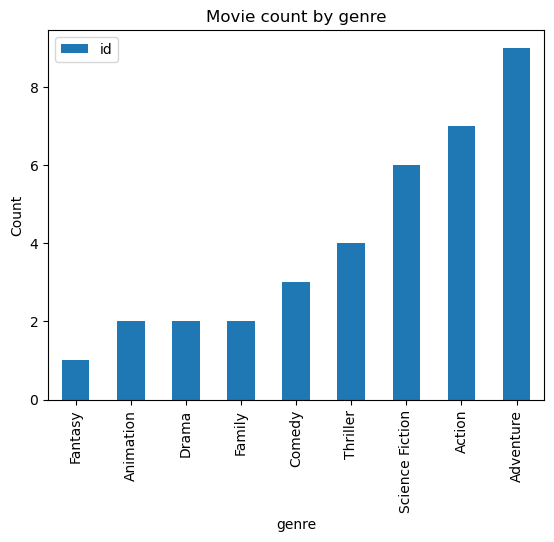

In [67]:
import matplotlib.pyplot as plt
# Plot a bar chart of the genre_count
genre_count.plot(kind='bar')
plt.title('Movie count by genre')
plt.ylabel('Count')
plt.show()

> You see from the results that adventure and action are the most popular genres.

#### Using Outer Join to Select Actors

One cool aspect of using an outer join is that, because it returns all rows from both merged tables and null where they do not match, you can use it to find rows that do not have a match in the other table. To try for yourself, you have been given two tables with a list of actors from two popular movies: Iron Man 1 and Iron Man 2. Most of the actors played in both movies. Use an outer join to find actors who did not act in both movies.

The `Iron Man 1` table is called `iron_1_actors`, and `Iron Man 2` table is called `iron_2_actors`. Both tables have been loaded for you and a few rows printed so you can see the structure.


In [70]:
import os
# os.listdir('datasets_join/')

In [71]:
import pandas as pd
actors_movies = pd.read_csv('datasets_join/actors_movies.csv')
actors_movies.head()

,Actor,Title
0,"[Emil Eifrem,Hugo Weaving,Laurence Fishburne,C...",The Matrix
1,"[Hugo Weaving,Laurence Fishburne,Carrie-Anne M...",The Matrix Reloaded
2,"[Hugo Weaving,Laurence Fishburne,Carrie-Anne M...",The Matrix Revolutions
3,"[Al Pacino,Charlize Theron,Keanu Reeves]",The Devil's Advocate
4,"[James Marshall,Kevin Pollak,J.T. Walsh,Aaron ...",A Few Good Men


In [72]:
casts = pd.read_pickle('datasets_join/casts.p')
casts.head()

,movie_id,cast_id,character,gender,id,name
7,5,22,Jezebel,1,3122,Sammi Davis
8,5,23,Diana,1,3123,Amanda de Cadenet
9,5,24,Athena,1,3124,Valeria Golino
3,5,25,Elspeth,1,3125,Madonna
12,5,26,Eva,1,3126,Ione Skye


In [73]:
movies.head()

,id,title,popularity,release_date
0,257,Oliver Twist,20.415572,2005-09-23
1,14290,Better Luck Tomorrow,3.877036,2002-01-12
2,38365,Grown Ups,38.864027,2010-06-24
3,9672,Infamous,3.680896,2006-11-16
4,12819,Alpha and Omega,12.300789,2010-09-17


In [74]:
ironman_1 = movies['title'].isin(['Iron Man'])
movies[ironman_1]

,id,title,popularity,release_date
2198,1726,Iron Man,120.725053,2008-04-30


In [75]:
ironman_2 = movies['title'].isin(['Iron Man 2'])
movies[ironman_2]

,id,title,popularity,release_date
3401,10138,Iron Man 2,77.300194,2010-04-28


In [76]:
# Iron man 3 casts
iron_1_actors = casts[casts['movie_id']==1726][['character', 'id', 'name']]
iron_1_actors.head()

,character,id,name
3,Yinsen,17857,Shaun Toub
4,"Virginia ""Pepper"" Potts",12052,Gwyneth Paltrow
2,Obadiah Stane / Iron Monger,1229,Jeff Bridges
1,"Lt. Col. James ""Rhodey"" Rhodes / War Machine",18288,Terrence Howard
7,Christine Everhart,57451,Leslie Bibb


In [77]:
# Iron man 2 casts
iron_2_actors = casts[casts['movie_id']==10138][['character', 'id', 'name']]
iron_2_actors.head()

,character,id,name
4,Ivan Vanko / Whiplash,2295,Mickey Rourke
3,Natalie Rushman / Natasha Romanoff / Black Widow,1245,Scarlett Johansson
5,Justin Hammer,6807,Sam Rockwell
6,Director Nick Fury,2231,Samuel L. Jackson
1,"Virginia ""Pepper"" Potts",12052,Gwyneth Paltrow


In [176]:
# Merge iron_1_actors to iron_2_actors on id with outer join using suffixes
iron_1_and_2 = iron_1_actors.merge(iron_2_actors,
                                     on='id',
                                     how='outer',
                                     suffixes=['_1','_2'])

# Create an index that returns true if name_1 or name_2 are null
index_null = iron_1_and_2['name_1'].isnull() | iron_1_and_2['name_2'].isnull()

# Print the first few rows of iron_1_and_2
iron_1_and_2[index_null].head()

,character_1,id,name_1,character_2,name_2
0,Obadiah Stane / Iron Monger,1229,Jeff Bridges,NaN,NaN
1,NaN,1245,NaN,Natalie Rushman / Natasha Romanoff / Black Widow,Scarlett Johansson
2,NaN,1896,NaN,"Lt. Col. James ""Rhodey"" Rhodes / War Machine",Don Cheadle
4,NaN,2295,NaN,Ivan Vanko / Whiplash,Mickey Rourke
7,NaN,6807,NaN,Justin Hammer,Sam Rockwell


> Using an outer join, you were able to pick only those rows where the actor played in only one of the two movies.

### Self Join

Merging a table to itself can be useful when you want to compare values in a column to other values in the same column. In this exercise, you will practice this by creating a table that for each movie will list the movie director and a member of the crew on one row.

You have been given a table called `crews`, which has columns `id`, `job`, and `name`.

First, merge the table to itself using the movie ID. This merge will give you a larger table where for each movie, every job is matched against each other.

Then select only those rows with a director in the left table, and avoid having a row where the director's job is listed in both the left and right tables. This filtering will remove job combinations that aren't with the director.

In [183]:
crews = pd.read_pickle('datasets_join/crews.p')
crews.head()

,id,department,job,name
0,19995,Editing,Editor,Stephen E. Rivkin
2,19995,Sound,Sound Designer,Christopher Boyes
4,19995,Production,Casting,Mali Finn
6,19995,Directing,Director,James Cameron
7,19995,Writing,Writer,James Cameron


In [185]:
# Merge the crews table to itself
crews_self_merged = crews.merge(crews, on='id', how='inner', suffixes=['_dir', '_crew'])

In [187]:
crews_self_merged.head()

,id,department_dir,job_dir,name_dir,department_crew,job_crew,name_crew
0,19995,Editing,Editor,Stephen E. Rivkin,Editing,Editor,Stephen E. Rivkin
1,19995,Editing,Editor,Stephen E. Rivkin,Sound,Sound Designer,Christopher Boyes
2,19995,Editing,Editor,Stephen E. Rivkin,Production,Casting,Mali Finn
3,19995,Editing,Editor,Stephen E. Rivkin,Directing,Director,James Cameron
4,19995,Editing,Editor,Stephen E. Rivkin,Writing,Writer,James Cameron


In [199]:
boolean_filter = ((crews_self_merged['job_dir'] == 'Director') & (crews_self_merged['job_crew'] != 'Director'))

In [201]:
direct_crews = crews_self_merged[boolean_filter]

In [203]:
direct_crews.head()

,id,department_dir,job_dir,name_dir,department_crew,job_crew,name_crew
156,19995,Directing,Director,James Cameron,Editing,Editor,Stephen E. Rivkin
157,19995,Directing,Director,James Cameron,Sound,Sound Designer,Christopher Boyes
158,19995,Directing,Director,James Cameron,Production,Casting,Mali Finn
160,19995,Directing,Director,James Cameron,Writing,Writer,James Cameron
161,19995,Directing,Director,James Cameron,Art,Set Designer,Richard F. Mays


>By merging the table to itself, you compared the value of the __director__ from the jobs column to other values from the jobs column. With the output, you can quickly see different movie directors and the people they worked with in the same movie.

### Index merge for movie ratings
To practice merging on indexes, you will merge `movies` and a table called `ratings` that holds info about movie ratings. Ensure that your merge returns all rows from the `movies` table, and only matching rows from the `ratings` table.

In [207]:
ratings = pd.read_pickle('datasets_join/ratings.p')
ratings.head()

,id,vote_average,vote_count
0,19995,7.2,11800.0
1,285,6.9,4500.0
2,206647,6.3,4466.0
3,49026,7.6,9106.0
4,49529,6.1,2124.0


In [211]:
# Merge to the movies table the ratings table on the index
movies_ratings = movies.merge(ratings, on='id')

# Print the first few rows of movies_ratings
movies_ratings.head()

,id,title,popularity,release_date,vote_average,vote_count
0,257,Oliver Twist,20.415572,2005-09-23,6.7,274.0
1,14290,Better Luck Tomorrow,3.877036,2002-01-12,6.5,27.0
2,38365,Grown Ups,38.864027,2010-06-24,6.0,1705.0
3,9672,Infamous,3.680896,2006-11-16,6.4,60.0
4,12819,Alpha and Omega,12.300789,2010-09-17,5.3,124.0


### Do sequels earn more?

It is time to put together many of the aspects that you have learned in this chapter. In this exercise, you'll find out which movie sequels earned the most compared to the original movie. To answer this question, you will merge a modified version of the `sequels` and `financials` tables where their index is the movie ID. You will need to choose a merge type that will return all of the rows from the `sequels` table and not all the rows of `financials` table need to be included in the result. From there, you will join the resulting table to itself so that you can compare the revenue values of the original movie to the sequel. Next, you will calculate the difference between the two revenues and sort the resulting dataset.

In [214]:
sequels = pd.read_pickle('datasets_join/sequels.p')
sequels.head()

,id,title,sequel
0,19995,Avatar,<NA>
1,862,Toy Story,863
2,863,Toy Story 2,10193
3,597,Titanic,<NA>
4,24428,The Avengers,<NA>


In [216]:
financials = pd.read_pickle('datasets_join/financials.p')
financials.head()

,id,budget,revenue
0,19995,237000000,2.787965e+09
1,285,300000000,9.610000e+08
2,206647,245000000,8.806746e+08
3,49026,250000000,1.084939e+09
4,49529,260000000,2.841391e+08


In [220]:
sequels_fin = sequels.merge(financials,
                            on='id',
                            how='left')

sequels_fin.head()

,id,title,sequel,budget,revenue
0,19995,Avatar,<NA>,237000000.0,2.787965e+09
1,862,Toy Story,863,30000000.0,3.735540e+08
2,863,Toy Story 2,10193,90000000.0,4.973669e+08
3,597,Titanic,<NA>,200000000.0,1.845034e+09
4,24428,The Avengers,<NA>,220000000.0,1.519558e+09


In [222]:
# Self merge with suffixes as inner join with left on sequel and right on id
orig_seq = sequels_fin.merge(sequels_fin, how='inner', left_on='sequel', 
                             right_on='id', right_index=True,
                             suffixes=['_org', '_seq'])

# Add calculation to subtract revenue_org from revenue_seq 
orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']

In [224]:
# Select the title_org, title_seq, and diff 
titles_diff = orig_seq[['title_org', 'title_seq', 'diff']]

In [228]:
# Print the first rows of the sorted titles_diff
titles_diff.sort_values('diff', ascending=False).head()

,title_org,title_seq,diff
2929,Before Sunrise,The Amazing Spider-Man 2,700182027.0
1256,Star Trek III: The Search for Spock,The Matrix,376517383.0
293,Indiana Jones and the Temple of Doom,Man of Steel,329845518.0
1084,Saw,Superman Returns,287169523.0
1334,The Terminator,Star Trek Beyond,265100616.0


>Jurassic World had one of the highest of all, improvement in revenue compared to the original movie.